In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import svm, tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv(r'C:\Users\ambou\ml_python_2019\ML 2019\data\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns',50) 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [e for e in num_col if e not in remove_list]
col_categorical

['MaritalStatus',
 'Department',
 'Over18',
 'Attrition',
 'Gender',
 'JobRole',
 'EducationField',
 'BusinessTravel',
 'OverTime']

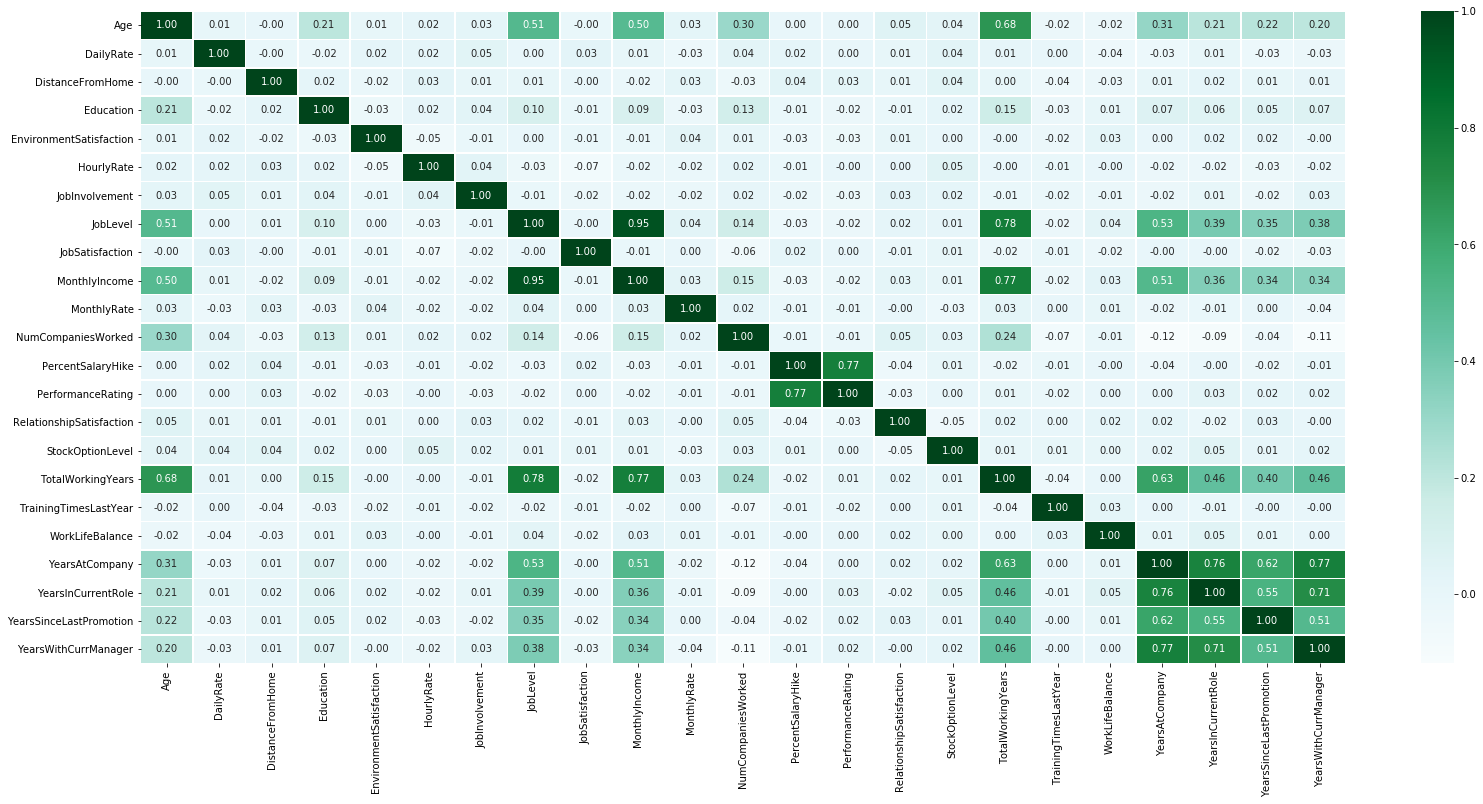

In [7]:
df[col_numerical].corr()
plt.figure(figsize=(27,12))
sns.heatmap(df[col_numerical].corr(), cmap='BuGn', annot=True, fmt='.2f', linewidths=.5)

In [8]:
y = df['YearsAtCompany'].values # Experimental linear regression model
equation = smf.ols(formula = 'y~YearsInCurrentRole+YearsWithCurrManager', data=df)
model = equation.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1567.
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:38:10   Log-Likelihood:                -3909.9
No. Observations:                1470   AIC:                             7826.
Df Residuals:                    1467   BIC:                             7842.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6677      0.145      4.608      0.000       0.383       0.952
YearsInCurrentRole       0.7226      0.036     20.282      0.000       0.653       0.792
YearsWithCurrManager     0.7966      0.036     22.020      0.000       0.726       0.868
==============================================================================
Omnibus:                     1011.136   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14767.443
Skew:                           3.071   Prob(JB):                         0.00
Kurtosis:                      17.261   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
attrition_map = {'Yes': 1, # Converting 'Yes' and 'No' labels into numerical digits for model
                 'No' : 0}
df['Attrition_num'] = df['Attrition'].map(attrition_map)
df['Attrition_num']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_num, Length: 1470, dtype: int64

In [10]:
col_numerical.append('Attrition_num')
col_numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition_num']

In [11]:
df['Attrition']  = df['Attrition_num']

In [35]:
clf = svm.SVC(kernel='linear', C=.01) #Test model. In this case a bad one (It just guessed 0 everytime and was 84% right lol)
X = df['Age'].values
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)
clf.fit(X_train.reshape(-1,1), y_train)
train_predictions = cross_val_predict(clf, X_train.reshape(-1,1), y_train, cv=5)
c = cross_val_score(clf, X_train.reshape(-1,1), y_train, scoring='accuracy')
matrix = confusion_matrix(y_train, train_predictions)
print(c, "\n\n", matrix )

[0.84150943 0.84150943 0.83773585 0.84090909 0.84090909] 

 [[1112    0]
 [ 211    0]]


In [68]:
clf1 = svm.SVC(kernel='linear', C=.01) #Repeat of above model using stratified k-fold cross validation due to imbalance of data
X = df['Age'].values
y = df['Attrition']
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X,y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
clf1.fit(X_train.reshape(-1,1), y_train)
train_predictions = cross_val_predict(clf1, X_train.reshape(-1,1), y_train, cv=5)
c = cross_val_score(clf1, X_train.reshape(-1,1), y_train, scoring='accuracy')
matrix = confusion_matrix(y_train, train_predictions)
print(c, "\n\n", matrix)

[0.83898305 0.83829787 0.83829787 0.83829787 0.83829787] 

 [[986   0]
 [190   0]]


In [71]:
df_cat = pd.get_dummies(df[col_categorical])
mX = pd.concat([df[col_numerical], df_cat], axis=1)
my = df['Attrition']
mX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [78]:
#Creating and training a decision tree
from sklearn.tree import DecisionTreeClassifier
classfy = DecisionTreeClassifier(random_state=42)
mX_train, mX_test, my_train, my_test = train_test_split(mX,my, test_size=0.1, random_state=0)
classfy.fit(mX_train, my_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [90]:
#Evaluating the decision tree
y_test_predicts = classfy.predict(mX_test)
conf_matrix = confusion_matrix(my_test, y_test_predicts)
acc_score = accuracy_score(my_test, y_test_predicts)
class_report = classification_report(my_test, y_test_predicts)

In [89]:
print(conf_matrix, acc_score, class_report, sep="\n\n") #100% test accuracy. something's up

[[121   0]
 [  0  26]]

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        26

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

